# LV 2.

[3차] 압축

https://school.programmers.co.kr/learn/courses/30/lessons/17684

**문제 설명**

    압축

    신입사원 어피치는 카카오톡으로 전송되는 메시지를 압축하여 전송 효율을 높이는 업무를 맡게 되었다. 메시지를 압축하더라도 전달되는 정보가 바뀌어서는 안 되므로, 압축 전의 정보를 완벽하게 복원 가능한 무손실 압축 알고리즘을 구현하기로 했다.

    어피치는 여러 압축 알고리즘 중에서 성능이 좋고 구현이 간단한 LZW(Lempel–Ziv–Welch) 압축을 구현하기로 했다. LZW 압축은 1983년 발표된 알고리즘으로, 이미지 파일 포맷인 GIF 등 다양한 응용에서 사용되었다.

    LZW 압축은 다음 과정을 거친다.

    1. 길이가 1인 모든 단어를 포함하도록 사전을 초기화한다.
    2. 사전에서 현재 입력과 일치하는 가장 긴 문자열 w를 찾는다.
    3. w에 해당하는 사전의 색인 번호를 출력하고, 입력에서 w를 제거한다.
    4. 입력에서 처리되지 않은 다음 글자가 남아있다면(c), w+c에 해당하는 단어를 사전에 등록한다.
    단계 2로 돌아간다.
    5. 압축 알고리즘이 영문 대문자만 처리한다고 할 때, 사전은 다음과 같이 초기화된다. 사전의 색인 번호는 정수값으로 주어지며, 1부터 시작한다고 하자.
    
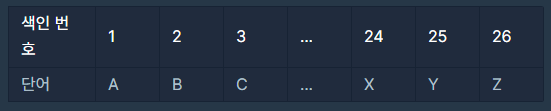


    예를 들어 입력으로 KAKAO가 들어온다고 하자.

    1.현재 사전에는 KAKAO의 첫 글자 K는 등록되어 있으나, 두 번째 글자까지인 KA는 없으므로, 첫 글자 K에 해당하는 색인 번호 11을 출력하고, 다음 글자인 A를 포함한 KA를 사전에 27 번째로 등록한다.
    2. 두 번째 글자 A는 사전에 있으나, 세 번째 글자까지인 AK는 사전에 없으므로, A의 색인 번호 1을 출력하고, AK를 사전에 28 번째로 등록한다.
    3. 세 번째 글자에서 시작하는 KA가 사전에 있으므로, KA에 해당하는 색인 번호 27을 출력하고, 다음 글자 O를 포함한 KAO를 29 번째로 등록한다.
    4. 마지막으로 처리되지 않은 글자 O에 해당하는 색인 번호 15를 출력한다.
    
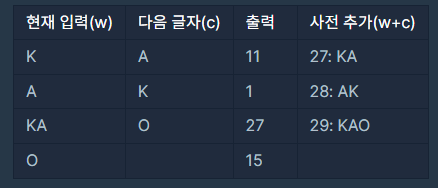   


    이 과정을 거쳐 다섯 글자의 문장 KAKAO가 4개의 색인 번호 [11, 1, 27, 15]로 압축된다.

    입력으로 TOBEORNOTTOBEORTOBEORNOT가 들어오면 다음과 같이 압축이 진행된다.
    
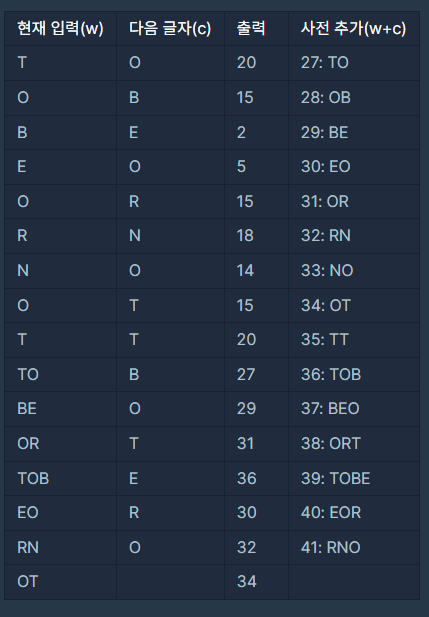


**입력 형식**

    입력으로 영문 대문자로만 이뤄진 문자열 msg가 주어진다. msg의 길이는 1 글자 이상, 1000 글자 이하이다.

**출력 형식**

    주어진 문자열을 압축한 후의 사전 색인 번호를 배열로 출력하라.
    
**입출력 예제**

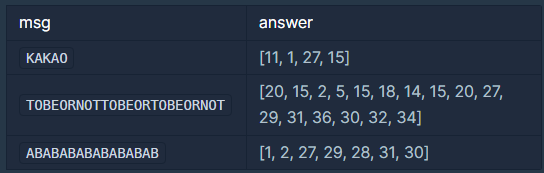

In [126]:
from string import ascii_uppercase

def solution(msg):
    alpha = {a:n for a,n in zip(ascii_uppercase,range(1,27))}
    start, end = 0,0
    answer = []
    
    while True:
        end +=1
        if end == len(msg):
            answer.append(alpha[msg[start:end]])
            break
        
        if msg[start:end+1] not in alpha:
            alpha[msg[start:end+1]] = sorted(alpha.values(), reverse=True)[0]+1
            answer.append(alpha[msg[start:end]])
            start = end 
            
    return answer

In [127]:
print(solution('KAKAO'))

[11, 1, 27, 15]


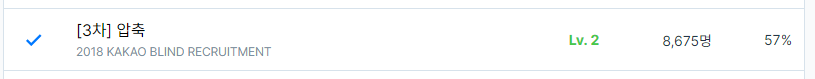

In [9]:
from string import ascii_uppercase

In [19]:
from string import ascii_uppercase
alpha = {a:n for a,n in zip(ascii_uppercase, range(1,27))}
alpha

{'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'J': 10,
 'K': 11,
 'L': 12,
 'M': 13,
 'N': 14,
 'O': 15,
 'P': 16,
 'Q': 17,
 'R': 18,
 'S': 19,
 'T': 20,
 'U': 21,
 'V': 22,
 'W': 23,
 'X': 24,
 'Y': 25,
 'Z': 26}

In [13]:
msg = 'TOBEORNOTTOBEORTOBEORNOT'

In [25]:
print(alpha.values())
print(alpha.keys())

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])


In [32]:
msg = 'KAKAO'

In [34]:
msg = 'TOBEORNOTTOBEORTOBEORNOT'

In [56]:
answer = []
alpha = {a:n for a,n in zip(ascii_uppercase, range(1,27))}
alpha_cnt = 26

for i,m in enumerate(msg):
    j = i+2
    tmp1 = msg[i]
    tmp2 = msg[i:j]

    if tmp2 not in alpha.keys():
        alpha_cnt +=1
        alpha[tmp2] = alpha_cnt
        print(f" tmp1 -> {tmp1}, tmp2 -> {tmp2}")
        
    else:
        print(msg[i:j+1])
        while msg[i:j+1] not in alpha.keys():
            alpha_cnt+=1
            alpha[msg[i:j+1]] = alpha_cnt
            
            if tmp2 in alpha.keys():
                break
            
            else:
                j+=1
            
    print(f" alpha -> {alpha}")

 tmp1 -> T, tmp2 -> TO
 alpha -> {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'TO': 27}
 tmp1 -> O, tmp2 -> OB
 alpha -> {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'TO': 27, 'OB': 28}
 tmp1 -> B, tmp2 -> BE
 alpha -> {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'TO': 27, 'OB': 28, 'BE': 29}
 tmp1 -> E, tmp2 -> EO
 alpha -> {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P'

In [81]:
def find_alpha(alpha, alpha_dict):
    if alpha in alpha_dict.keys():
        return alpha_dict[alpha], alpha_dict
    else:
        alpha_dict[alpha]= sorted(alpha_dict.values(),reverse=True)[0]+1    
        return 0, alpha_dict

In [89]:
def find_alpha(alpha, alpha_dict):
    if alpha in alpha_dict.keys():
        return alpha_dict[alpha], alpha_dict
    else:
        alpha_dict[alpha]= sorted(alpha_dict.values(),reverse=True)[0]+1    
        return 0, alpha_dict

from collections import deque

msg = 'TOBEORNOTTOBEORTOBEORNOT'
queue = deque(msg)


answer = []
alpha = {a:n for a,n in zip(ascii_uppercase, range(1,27))}
ans_tmp, ans_num = 0,0

tmp_str = ''
while queue:
    tmp_str+= queue.popleft()
    print(f" while 전 tmp_str -> {tmp_str}")
    ans_num, alpha = find_alpha(tmp_str, alpha)
    print(f" ans_num, alpha -> {ans_num}, {alpha}")
    
    if ans_num !=0:
        tmp_str += queue[0]
        
        while find_alpha(tmp_str, alpha)[0]!=0:
            ans_tmp, alpha = find_alpha(tmp_str, alpha)
    
    tmp_str = ''
    answer.append(ans_num)
    
answer

 while 전 tmp_str -> T
 ans_num, alpha -> 20, {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
 while 전 tmp_str -> O
 ans_num, alpha -> 15, {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'TO': 27}
 while 전 tmp_str -> B
 ans_num, alpha -> 2, {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'TO': 27, 'OB': 28}
 while 전 tmp_str -> E
 ans_num, alpha -> 5, {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 

KeyboardInterrupt: 

In [96]:
from string import ascii_uppercase
msg = 'TOBEORNOTTOBEORTOBEORNOT'

alpha = {a:n for a,n in zip(ascii_uppercase, range(1,27))}
answer = []
start, end = 0,0

while True:
    end +=1
    print(f" start, end ->{start}, {end}")
    
    if end == len(msg):
        answer.append(alpha[msg[start:end]])
        break
    
    if msg[start:end+1] not in alpha:
        alpha[msg[start:end+1]] = sorted(alpha.values(),reverse=True)[0]+1
        print(f"alpha -> {alpha}")
        answer.append(alpha[msg[start:end]])
        start= end

answer

 start, end ->0, 1
alpha -> {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'TO': 27}
 start, end ->1, 2
alpha -> {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'TO': 27, 'OB': 28}
 start, end ->2, 3
alpha -> {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'TO': 27, 'OB': 28, 'BE': 29}
 start, end ->3, 4
alpha -> {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 

[20, 15, 2, 5, 15, 18, 14, 15, 20, 27, 29, 31, 36, 30, 32, 34]

**다른 사람 풀이**

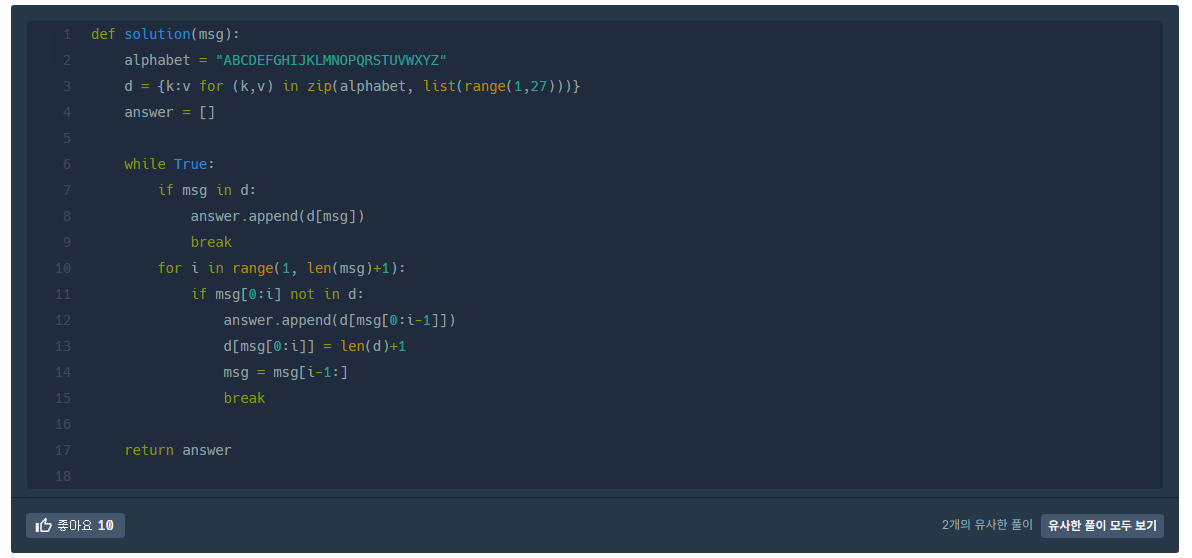

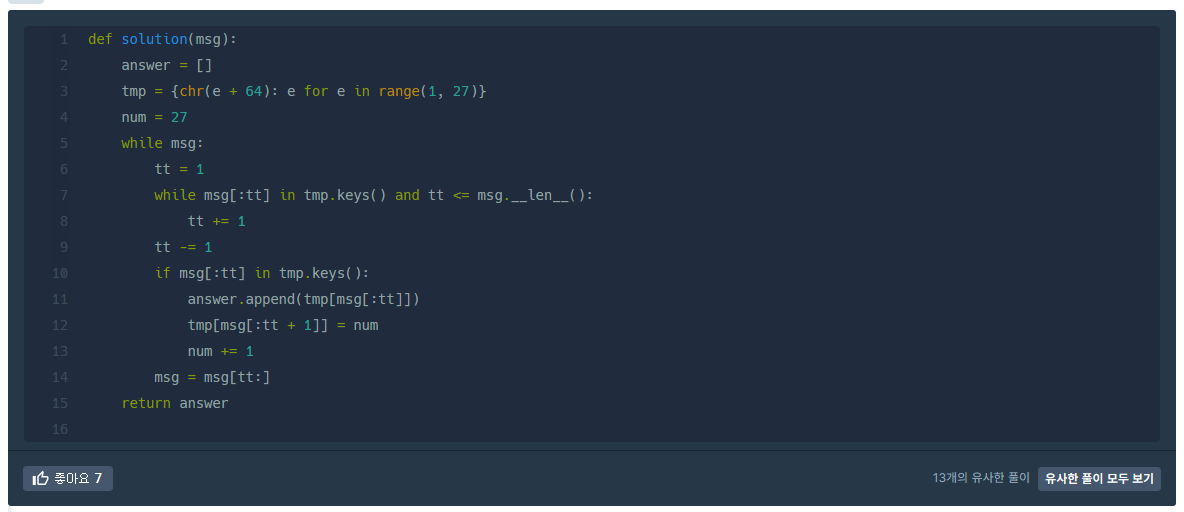